In [1]:
import pandas as pd

df = pd.read_csv('../data/schemaAgnosticSemanticWeightsResults.csv', sep='|')
df

,Dataset,Embeddings,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Average Characters D2,Average Tokens D2,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,FastText,Cosine Similarity,Scarce,764784,Restaurants,107,21,111,21,...,0.651685,0.630435,0.95,108,0.571429,0.719101,0.636816,0.95,15,Right
1,Restaurants,FastText,Euclidean Distance,Scarce,764784,Restaurants,107,21,111,21,...,0.629214,0.647399,0.65,37,0.628866,0.685393,0.655914,0.65,8,Right
2,Abt-Buy,FastText,Cosine Similarity,Balanced,1157776,E-commerce,307,60,90,20,...,0.228625,0.337680,0.80,152,0.458874,0.394052,0.424000,0.80,124,Left
3,Abt-Buy,FastText,Euclidean Distance,Balanced,1157776,E-commerce,307,60,90,20,...,0.201673,0.301808,0.45,278,0.402142,0.383829,0.392772,0.40,918,Left
4,Amazon-Google Products,FastText,Cosine Similarity,One-sided,4114806,E-commerce,1325,228,259,50,...,0.268116,0.316070,0.65,2451,0.246355,0.290761,0.266722,0.80,3436,Left
5,Amazon-Google Products,FastText,Euclidean Distance,One-sided,4114806,E-commerce,1325,228,259,50,...,0.261775,0.306631,0.40,2496,0.231111,0.282609,0.254279,0.40,5521,Left
6,DBLP-ACM,FastText,Cosine Similarity,Balanced,6001104,Bibliographic,122,21,145,25,...,0.946043,0.965359,0.70,3737,0.965935,0.968975,0.967452,0.85,335,Left
7,DBLP-ACM,FastText,Euclidean Distance,Balanced,6001104,Bibliographic,122,21,145,25,...,0.948291,0.966102,0.45,2174,0.960378,0.959083,0.959730,0.50,481,Left
8,DBLP-ACM,Albert,Cosine Similarity,Balanced,6001104,Bibliographic,122,21,145,25,...,0.231115,0.308153,0.80,2568,0.511085,0.196942,0.284323,0.95,67,Left
9,DBLP-ACM,Albert,Euclidean Distance,Balanced,6001104,Bibliographic,122,21,145,25,...,0.216277,0.303566,0.25,345,0.377224,0.238309,0.292091,0.25,115,Left


In [2]:
thresholds = pd.DataFrame()
thresholds['Dataset'] = df['Dataset']

for column in df:
    if (0 < column.find('Threshold')):
            thresholds[column] = df[column]
            
thresholds.columns = ['Dataset', 'CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
thresholds.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,21.000,21.000,21.000,21.000,21.000,21.000,21.000,21.000
mean,0.681,0.736,0.664,0.595,0.707,0.667,0.638,0.674
std,0.288,0.242,0.278,0.329,0.256,0.268,0.258,0.274
min,0.000,0.100,0.050,0.050,0.100,0.050,0.050,0.050
25%,0.550,0.550,0.450,0.300,0.500,0.450,0.450,0.450
50%,0.750,0.850,0.800,0.750,0.850,0.800,0.700,0.800
75%,0.950,0.950,0.850,0.850,0.950,0.900,0.850,0.850
max,0.950,0.950,0.950,0.950,0.950,0.950,0.950,0.950


In [4]:
corr = thresholds.corr()
corr.style.format('{:.2f}').background_gradient(cmap='coolwarm')

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
CNC,1.00,0.69,0.64,0.41,0.69,0.67,0.60,0.66
RSR,0.69,1.00,0.94,0.72,0.98,0.96,0.95,0.97
RCA,0.64,0.94,1.00,0.81,0.96,0.95,0.96,0.98
BAH,0.41,0.72,0.81,1.00,0.72,0.73,0.81,0.82
BMC,0.69,0.98,0.96,0.72,1.00,0.97,0.94,0.97
EXC,0.67,0.96,0.95,0.73,0.97,1.00,0.93,0.96
KRC,0.60,0.95,0.96,0.81,0.94,0.93,1.00,0.98
UMC,0.66,0.97,0.98,0.82,0.97,0.96,0.98,1.00


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

Text(0.5, 1.0, 'Schema-Agnostic Semantic Weights')

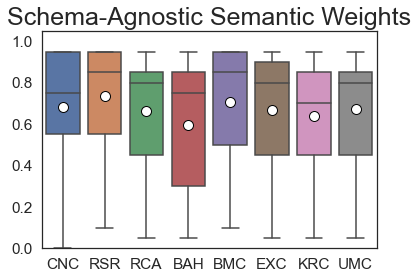

In [6]:
ax = sns.boxplot(data = thresholds,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"})
ax.set(ylim=(0.0, 1.05))
ax.set_title("Schema-Agnostic Semantic Weights", fontsize = 25)
# plt.savefig('saseThr.eps', format='eps')

In [7]:
datasets = ['Restaurants', 'Abt-Buy', 'Amazon-Google Products', 'DBLP-ACM', 'IMDB-TMDB', 
            'IMDB-TVDB', 'TMDB-TVDB', 'Walmart-Amazon', 'DBLP-Scholar', 'Movies']

Text(0.5, 1.0, 'Schema-Agnostic Semantic Weights')

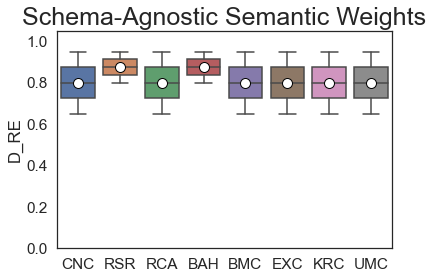

In [8]:
dataset_df = thresholds[thresholds['Dataset']==datasets[0]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_RE')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Agnostic Semantic Weights", fontsize = 25)
# plt.savefig('saseD1.eps', format='eps')

[(0.0, 1.0)]

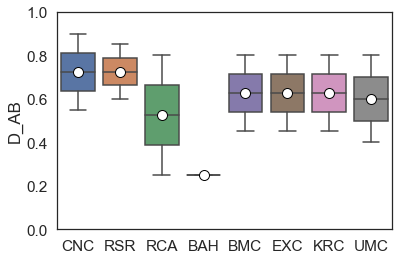

In [9]:
dataset_df = thresholds[thresholds['Dataset']==datasets[1]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AB')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD2.eps', format='eps')

[(0.0, 1.0)]

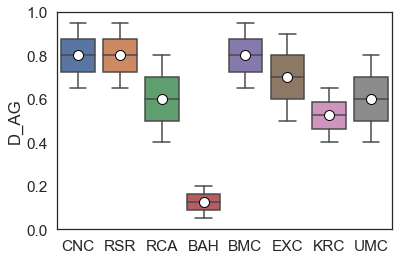

In [10]:
dataset_df = thresholds[thresholds['Dataset']==datasets[2]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_AG')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD3.eps', format='eps')

[(0.0, 1.0)]

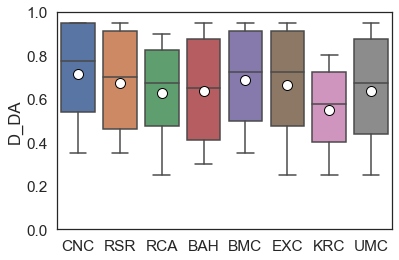

In [11]:
dataset_df = thresholds[thresholds['Dataset']==datasets[3]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD4.eps', format='eps')

[(0.0, 1.0)]

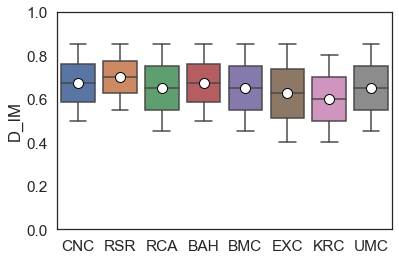

In [12]:
dataset_df = thresholds[thresholds['Dataset']==datasets[4]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IM')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD5.eps', format='eps')

Text(0.5, 1.0, 'Schema-Agnostic Semantic Weights')

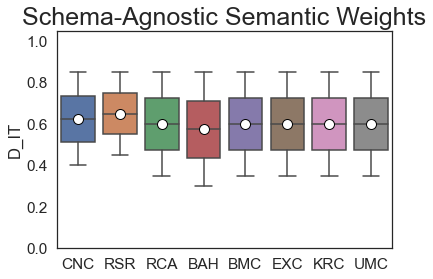

In [13]:
dataset_df = thresholds[thresholds['Dataset']==datasets[5]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_IT')
p.set(ylim=(0.0, 1.05))
p.set_title("Schema-Agnostic Semantic Weights", fontsize = 25)
# plt.savefig('saseD6.eps', format='eps')

[(0.0, 1.0)]

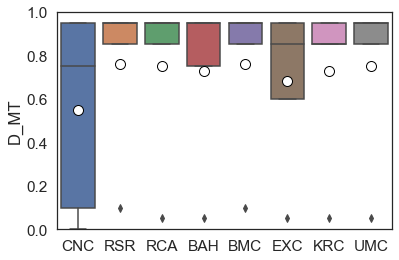

In [14]:
dataset_df = thresholds[thresholds['Dataset']==datasets[6]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_MT')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD7.eps', format='eps')

C:\Users\Georgios\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[(0.0, 1.0)]

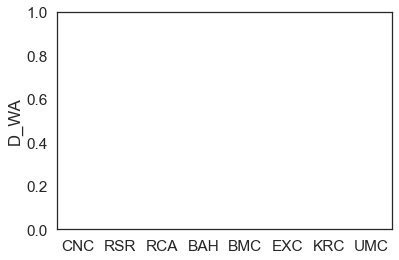

In [15]:
dataset_df = thresholds[thresholds['Dataset']==datasets[7]]
dataset_df.drop('Dataset', axis=1, inplace=True)
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_WA')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD8.eps', format='eps')

[(0.0, 1.0)]

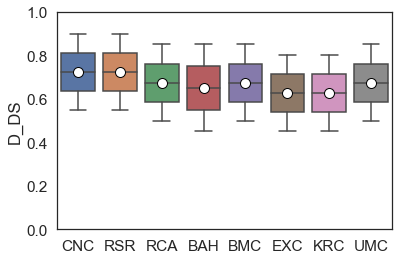

In [16]:
dataset_df = thresholds[thresholds['Dataset']==datasets[8]]
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_DS')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD9.eps', format='eps')

C:\Users\Georgios\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


[(0.0, 1.0)]

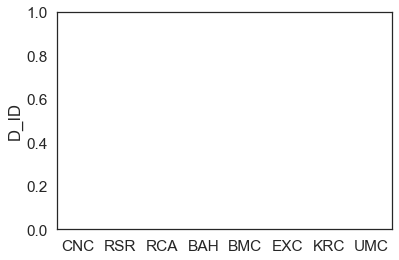

In [17]:
dataset_df = thresholds[thresholds['Dataset']==datasets[9]]
dataset_df.drop('Dataset', axis=1, inplace=True)
p = sns.boxplot(data = dataset_df,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_ylabel('D_ID')
p.set(ylim=(0.0, 1.0))
# plt.savefig('saseD10.eps', format='eps')